## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


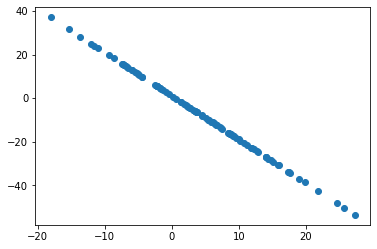

In [314]:
np.random.seed(555)
x=np.random.normal(0.2,0.5,100)*20
x=x.reshape(-1,1)
a = -2
b = 1
y = (a*x)+b
y=y.reshape(-1,1)
plt.scatter(x,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [315]:
def cost(theta_0,theta_1,x,y):
    h =theta_0 + (theta_1 * x)
    cost = (1/(2*len(x))*np.sum((h-y)**2))
    return cost
def gradient(theta_0 , theta_1 , x , y):
    grad_0 = (1/len(x)) * np.sum((theta_0 + theta_1*x)-y)
    grad_1 = (1/len(x)) * np.sum(((theta_0 + theta_1*x)-y)*x)
    return grad_0, grad_1
def update(theta_0,theta_1,x,y,alpha):
    theta_0 = theta_0 - alpha * gradient(theta_0, theta_1, x, y)[0]
    theta_1 = theta_1 - alpha * gradient(theta_0, theta_1, x, y)[1]
    return theta_0,theta_1
def linear_regr(x,y,alpha,epochs):
    theta_0, theta_1= 0,0
    epochs = 500
    losses = []
    iterations = []
    theta_0_A=[]
    theta_1_A=[]
    for i in range(0,epochs):
        losses.append(cost(theta_0, theta_1, x, y))
        theta_0,theta_1=update(theta_0,theta_1,x,y,alpha)
        theta_0_A.append(theta_0)
        theta_1_A.append(theta_1)
        iterations.append(i)
    return theta_0,theta_1,losses,iterations,theta_0_A,theta_1_A

#### Try your function with any input parameterss of your choice.

In [316]:
alpha=0.001
epcho=1000
theta_0,theta_1,loss,itera,theta_0_A,theta_1_A=linear_regr(x,y,alpha,epcho)

#### Calculate r2 score

In [317]:
h=theta_0+(theta_1*x)
h = h.reshape(-1,1)
r2_score(y,h)

0.998786514543956

#### Plot loss vs. epochs

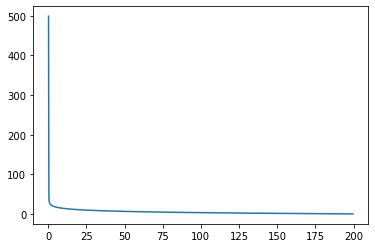

In [318]:
plt.plot(loss,itera)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

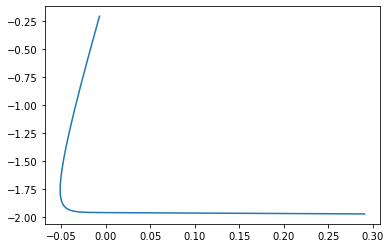

In [319]:
plt.plot(theta_0_A , theta_1_A)

#### Plot all regression lines till converge

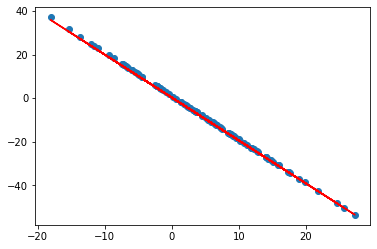

In [320]:
plt.scatter(x,y)
plt.plot(x,h,color='red')

#### Plot the best regression line

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [321]:
alpha=0.0001
epcho=1000
theta_0,theta_1,loss,itera,theta_0_A,theta_1_A=linear_regr(x,y,alpha,epcho)

In [322]:
h2=theta_0+(theta_1*x)
h2 = h2.reshape(-1,1)

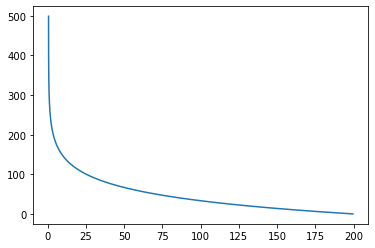

In [323]:
plt.plot(loss,itera)

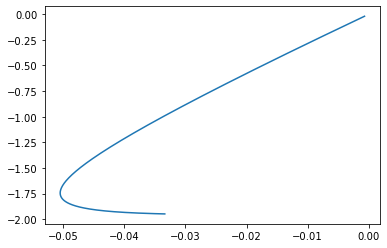

In [324]:
plt.plot(theta_0_A , theta_1_A)

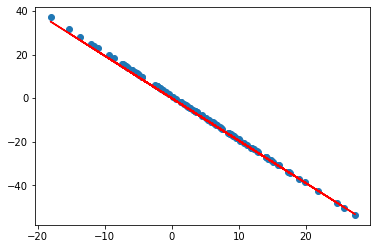

In [325]:
plt.scatter(x,y)
plt.plot(x,h2,color='red')

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

(100, 1)


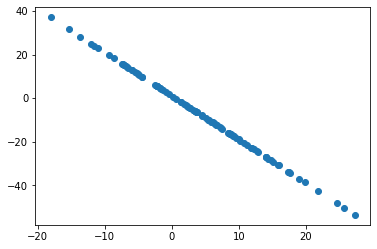

In [326]:
np.random.seed(555)
x=np.random.normal(0.2,0.5,100)*20
x=x.reshape(-1,1)
a = -2
b = 1
y = (a*x)+b
y=y.reshape(-1,1)
plt.scatter(x,y)
print(y.shape)

In [327]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [328]:
def gradient(x, y, theta):
    h = hypothesis(x, theta)
    grad = np.dot(x.transpose(), (h - y))
    return grad

In [329]:
def cost(x, y, theta):
    h = hypothesis(x,theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

In [330]:
def update(theta,x,y,alpha):
    delta_theta=gradient(theta,x,y)
    theta_new=theta-(alpha*delta_theta)
    return theta_new,delta_theta

In [332]:
def create_mini_batches(x, y, batch_size):
    mini_batches = []
    data = np.hstack((x, y))
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [335]:
def gradientDescent(x, y, alpha, batch_size,max_iters):
    theta = np.zeros((x.shape[1], 1))
    error_list = []
    for itr in range(max_iters):
        mini_batches = create_mini_batches(x, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - alpha * gradient(X_mini, y_mini,theta)
            error_list.append(cost(X_mini, y_mini,theta))
    return theta, error_list

In [336]:
alpha=0.0001
epcho=300
batchsize=32
theta, loss = gradientDescent(x,y,alpha,batchsize,epcho)
print(len(loss))

1500


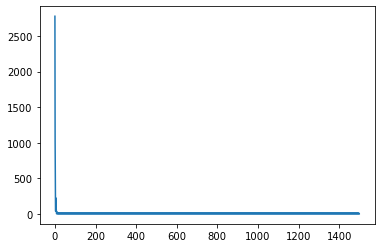

In [337]:
h3=hypothesis(x, theta)
plt.plot(loss)

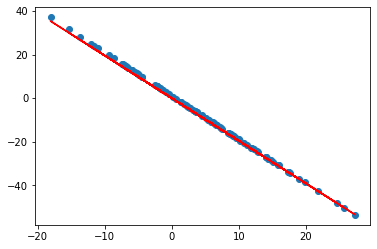

In [338]:
plt.scatter(x,y)
plt.plot(x,h3,color='red')

In [339]:
r2_score(y,h3)

0.997584521780167

In [197]:
# xshuffled=np.copy(x)
# for i in range(0,100):
#     np.random.seed(42)
#     np.random.shuffle(xshuffled)
# yshuffled=(-2*xshuffled)+1
# yshuffled=yshuffled.reshape(-1,1)

In [363]:
def gradientDescent(x, y, alpha, batch_size,max_iters):
    theta = np.zeros((x.shape[1], 1))
    error_list = []
    for itr in range(max_iters):
        x,y = shuffle(x,y)
        mini_batches = create_mini_batches(x, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - alpha * gradient(X_mini, y_mini,theta)
            error_list.append(cost(X_mini, y_mini,theta))
        if(len(loss)>1):
            if (np.linalg.norm(theta) < 0.1) or (abs((loss[-1]-loss[-2]))<0.1) :
                break
    return theta, error_list

In [364]:
alpha=0.0001
epcho=3000
batchsize=32
theta, loss = gradientDescent(x,y,alpha,batchsize,epcho)
print(type(theta))
print(theta)
print(len(loss))

<class 'numpy.ndarray'>
[[-1.4261102]]
5


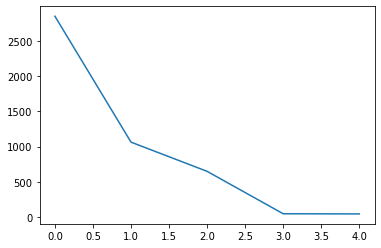

In [365]:
h3=hypothesis(x, theta)
plt.plot(loss)

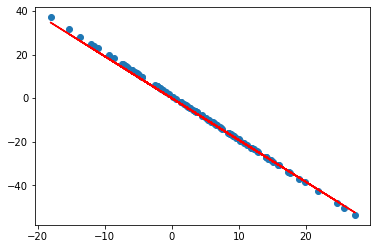

In [343]:
plt.scatter(x,y)
plt.plot(x,h3,color='red')

In [202]:
r2_score(y,h3)

0.9970549691415651

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [28]:
def hOfx2(theta0,theta1,x,y):
    return theta0+(theta1*(x))

In [29]:
def cost2(theta0,theta1,x,y): 
    h = hOfx2(theta0,theta1,x,y)
    cost=(1/2)*sum((h-y)**2)
    return cost

In [30]:
def gradient2(theta0,theta1,x,y):
    h = hOfx2(theta0,theta1,x,y)
    delta_theta_0=sum(h-y)
    delta_theta_1=(1/(len(x))*sum((h-y)*x))
    return delta_theta_0,delta_theta_1

In [31]:
def update2(theta_0,theta_1,x,y,alpha):
    delta_theta_0,delta_theta_1=gradient2(theta_0,theta_1,x,y)
    theta_0=theta_0-(alpha*delta_theta_0)
    theta_1=theta_1-(alpha*delta_theta_1)
    return theta_0,theta_1

In [32]:
def GD2(x,y,alpha,iterat):
    theta_0 = 0
    theta_1 = 0
    loss=[]
    itera=[]
    theta_0_A=[]
    theta_1_A=[]
    for i in range(0,iterat):
        loss.append(cost2(theta_0,theta_1,x,y))
        theta_0,theta_1=update2(theta_0,theta_1,x,y,alpha)
        theta_0_A.append(theta_0)
        theta_1_A.append(theta_1)
        itera.append(i)
    return theta_0,theta_1,loss,itera,theta_0_A,theta_1_A

In [33]:
alpha=0.0001
echo=1500
theta_0,theta_1,loss,itera,theta_0_A , theta_1_A=GD2(x,y,alpha,echo)

In [34]:
h2=theta_0+(theta_1*x)
h2 = h2.reshape(-1,1)

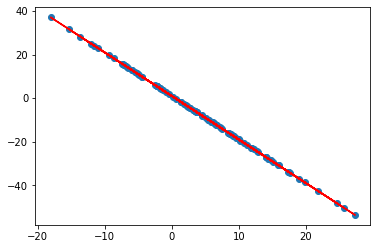

In [35]:
plt.scatter(x,y)
plt.plot(x,h2,color='red')

In [36]:
r2_score(y,h2)

0.9999999958278215

In [37]:
alpha=0.0001
echo=1500
theta_0,theta_1,loss,itera,theta_0_A , theta_1_A=GD2(xshuffled,yshuffled,alpha,echo)

In [38]:
h2=theta_0+(theta_1*xshuffled)
h2 = h2.reshape(-1,1)

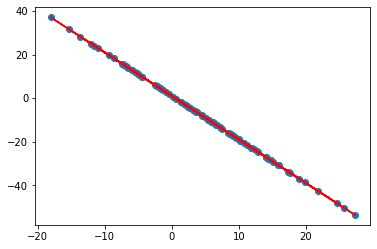

In [39]:
plt.scatter(xshuffled,yshuffled)
plt.plot(xshuffled,h2,color='red')

In [40]:
r2_score(yshuffled,h2)

0.9999999958278215

In [220]:
df1 = pd.read_csv('MultipleLR.csv',names=["x1","x2","x3","x4"])
arr1=np.array(df1)
x=np.array(df1[["x1","x2","x3"]])
print(x.shape)
x1=np.ones(len(arr1[:][:]))
x1=x1.reshape(-1,1)
print(x1.shape)
x=np.concatenate((x1,x),axis=1)
print(x.shape)
y=np.array(df1[["x4"]])
print(y.shape)
# x=x.T
# print(x.shape)

(25, 3)
(25, 1)
(25, 4)
(25, 1)


In [250]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [251]:
def gradient(x, y, theta):
    h = hypothesis(x, theta)
    grad = np.dot(x.transpose(), (h - y))
    return grad

In [252]:
def cost(x, y, theta):
    h = hypothesis(x,theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

In [253]:
def update(theta,x,y,alpha):
    delta_theta=gradient(theta,x,y)
    theta_new=theta-(alpha*delta_theta)
    return theta_new,delta_theta

In [254]:
def create_mini_batches(x, y, batch_size):
    mini_batches = []
    data = np.hstack((x, y))
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [255]:
def gradientDescent(x, y, alpha, batch_size,max_iters):
    theta = np.zeros((x.shape[1], 1))
    error_list = []
    for itr in range(max_iters):
        x,y = shuffle(x,y)
        mini_batches = create_mini_batches(x, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - alpha * gradient(X_mini, y_mini,theta)
            error_list.append(cost(X_mini, y_mini,theta))
    return theta, error_list

In [256]:
alpha=0.00001
epcho=5
batchsize=3
theta, loss = gradientDescent(x,y,alpha,batchsize,epcho)
print(theta)
print(len(loss))

[[0.00806467]
 [0.67584757]
 [0.67676926]
 [0.69155137]]
50


In [257]:
h3=hypothesis(x, theta)

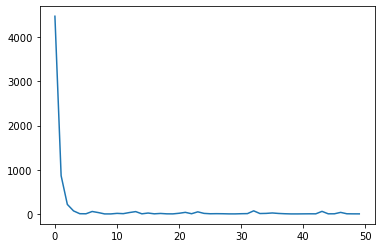

In [258]:
plt.plot(loss)

ValueError: x and y must be the same size

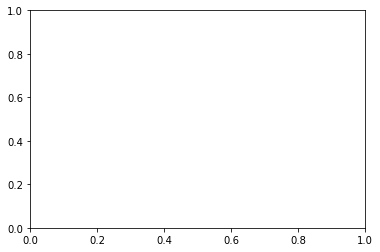

In [248]:
plt.scatter(x,y,c='b.')
plt.plot(x,h3,color='red')

In [259]:
r2_score(y,h3)

0.9745681406402623